In [1]:
!pip install qiskit==0.45.1
!pip install qiskit-nature==0.7.1
!pip install pyscf
!pip install --upgrade pyscf
!pip install pylatexenc
!pip install qiskit-aer==0.13.2

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 660.9 kB/s eta 0:00:00m eta 0:00:010:00:02
  Attempting uninstall: pyscf
    Found existing installation: pyscf 2.4.0
    Uninstalling pyscf-2.4.0:
      Successfully uninstalled pyscf-2.4.0
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 484.8 kB/s eta 0:00:001m497.4 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=97a6e3e3bfe3b6b5bb03c82db8ca85dca65022c1fedf00e4fbd13b875fc49014
  Stored in directory: /home/user/.cache/pip/wheels/b1/7a/

In [76]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
# from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper
from qiskit_nature.second_q.circuit.library import UCC,UCCSD, HartreeFock
from qiskit_nature.second_q.algorithms.initial_points import HFInitialPoint
# from qiskit_algorithms.optimizers import SLSQP, NELDER_MEAD, SPSA, L_BFGS_B, P_BFGS GradientDescent, ADAM, SPSA
from qiskit_algorithms.eigensolvers import VQD
from qiskit_algorithms.state_fidelities import ComputeUncompute, BaseStateFidelity
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator
# from qiskit_aer.primitives import Estimator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit import Aer
#from qiskit.providers.aer import AerSimulator

from qiskit.utils import QuantumInstance
from qiskit import qpy


# GA-VQE

In [77]:
import json

f5 = open(f"./4qubits_10points_8circuits_5depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data5 = json.loads(f5.read())

f6 = open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data6 = json.loads(f6.read())

f7 = open(f"./4qubits_10points_8circuits_7depth_20generations_VQE_H2_sto6g_fitness_2024-1-23_1000/metadata.json", "r")
data7 = json.loads(f7.read())

f8 = open(f"./4qubits_10points_8circuits_8depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data8 = json.loads(f8.read())

f9 = open(f"./4qubits_10points_8circuits_9depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data9 = json.loads(f9.read())

data = [data5["best_fitnesss"], data6["best_fitnesss"], data7["best_fitnesss"], data8["best_fitnesss"], data9["best_fitnesss"]]

with open(f"./4qubits_10points_8circuits_5depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz5 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz6 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_7depth_20generations_VQE_H2_sto6g_fitness_2024-1-23_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz7 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_8depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz8 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_9depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz9 = qpy.load(qpy_file_read)[0]

parameter = [ansatz5.num_parameters, ansatz6.num_parameters, ansatz7.num_parameters, ansatz8.num_parameters, ansatz9.num_parameters]

best_ansatz = [ansatz5, ansatz6, ansatz7, ansatz8, ansatz9]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


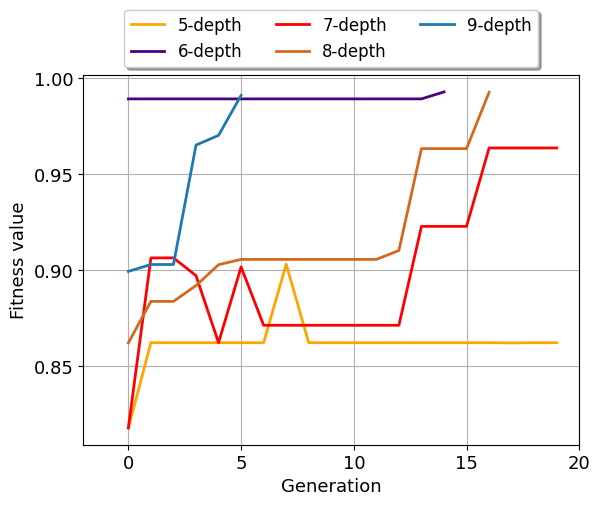

In [171]:
import matplotlib.pyplot as plt


fontsize = 13
# plt.yscale(;)

plt.grid()
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Fitness value", fontsize=13)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim(-2,20)
plt.locator_params(axis="both", nbins=5)
plt.plot(data5["best_fitnesss"], linewidth=2, label='5-depth', color='orange')
plt.plot(data6["best_fitnesss"], linewidth=2, label='6-depth', color='indigo')
plt.plot(data7["best_fitnesss"], linewidth=2, label='7-depth', color='red')
plt.plot(data8["best_fitnesss"], linewidth=2, label='8-depth', color='chocolate')
plt.plot(data9["best_fitnesss"], linewidth=2, label='9-depth')
# plt.savefig('Fitness_generation_H2.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.2),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize-1)
# plt.plot()
plt.savefig('GA-VQE_H2_fitness_multi-depth.eps', format='eps', dpi=600, bbox_inches='tight')

/tmp/ipykernel_497738/3037925157.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_axis ,fontsize=fontsize)


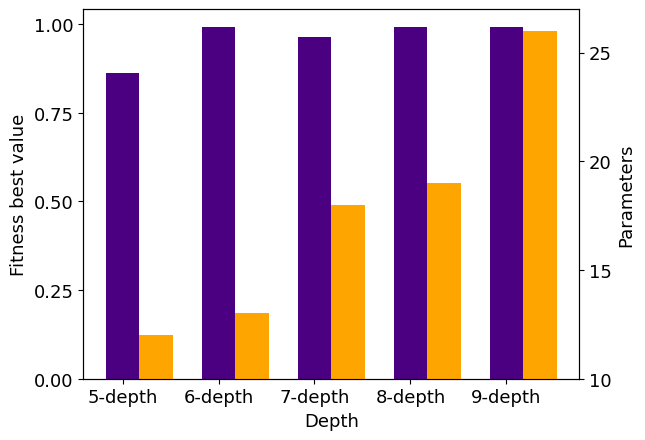

In [204]:
import matplotlib.pyplot as plt

# Sample data (modify these with your actual data)
x_axis = ["5-depth", "6-depth", "7-depth", "8-depth", "9-depth"]
data1 = [data[i][-1] for i in range(len(data))]
data2 = parameter

fontsize = 13

# Define width for each bar (adjust for spacing)
width = 0.35

# Create the figure and primary axes
fig, ax1 = plt.subplots()

# Plot bars for first y-axis (left side)
bar1 = ax1.bar(x_axis, data1, width, label='Fitness', color='indigo')

# ax1.set_ylim(0.86,1)
# Set secondary y-axis on the right side
ax2 = ax1.twinx()

# Plot bars for second y-axis (right side)
bar2 = ax2.bar([pos + width for pos in range(len(x_axis))], data2, width, color='orange')
# fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 0.98),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize-1)
# Set labels and title
ax1.set_xlabel('Depth', fontsize = fontsize)
ax1.set_ylabel('Fitness best value', fontsize = fontsize)
ax2.set_ylabel('Parameters', fontsize = fontsize)

ax1.set_xticklabels(x_axis ,fontsize=fontsize)
ax1.locator_params(axis="y", nbins=5)
ax1.tick_params(axis="y", labelsize=fontsize)
ax2.locator_params(axis="y", nbins=5)
ax2.set_ylim(10,27)
ax2.tick_params(axis="y", labelsize=fontsize)

# Add legend


# Show the plot
# plt.show()
plt.savefig('GA-VQE_H2_bestfitness-parameter_multi-depth.eps', format='eps', dpi=600, bbox_inches='tight')

In [158]:
vars(ax1.set_yticklabels)

{'__signature__': <Signature (self, labels, *, minor=False, fontdict=None, **kwargs)>}

In [136]:
with open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz = qpy.load(qpy_file_read)[0]

ansatz.draw("mpl").savefig("best_circuit_6depth.eps", bbox_inches='tight')
# ansatz.draw("mpl")

/home/user/.local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Optimized the VQE for Hydrogen atom with different ansatz depth from GA-VQE

In [21]:
optimize_energy = [[] for _ in range(5,10)]

from qiskit.algorithms.optimizers import COBYLA, NELDER_MEAD
import numpy as np
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
# from qiskit_algorithms import VQE
from qiskit import qpy
import json

basis_set = 'sto6g'

distance = np.linspace(0.25,2.5,10)

# seeds = np.arange(1,32)
seeds = [50]


for num_depth in range(len(optimize_energy)):
    
    ansatz = best_ansatz[num_depth]
    
    for i, dis in enumerate(distance):
      for j, seed in enumerate(seeds):
        interation = 1000
    
        # file = open(f'result_H2-modify_{seed}.txt', 'w')
        theta = dis
        driver = PySCFDriver(
            # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
            # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
            atom = f"H 0 0 0; H 0 0 {dis}",
            basis= basis_set,
            charge=0,
            spin=0,
            unit=DistanceUnit.ANGSTROM,
        )
    
        problem = driver.run()
        hamiltonian = problem.hamiltonian
        nuc = hamiltonian.nuclear_repulsion_energy
        hamiltonian = hamiltonian.second_q_op()
    
        mapper = JordanWignerMapper()
    
        qubit_op = mapper.map(hamiltonian)
    
    
    
        counts = []
        values = []
        steps = []
    
        def callback(eval_count, params, value, meta):
            counts.append(eval_count)
            values.append(value)
            # steps.append(step)
    
    
        # optimizer = NELDER_MEAD(maxiter=100)
        optimizer = COBYLA(maxiter=1000)
        #optimizer = SLSQP(maxiter=interation)
        # optimizer = GradientDescent(maxiter=100, learning_rate=0.01)
        # optimizer = SPSA(maxiter=5000, learning_rate=0.001, perturbation=0.001)
        # optimizer = ADAM(maxiter=2000, tol=1e-06, lr=seed*0.001, beta_1=0.9, beta_2=0.99)
    
        # optimizer = SLSQP(maxiter=40)
    
        # optimizer = COBYLA(maxiter=500)
    
        algorithm_globals.random_seed = seed
        estimator = Estimator()
    
        vqe = VQE(estimator = estimator, ansatz = ansatz, optimizer=optimizer, callback=callback)
        result1 = vqe.compute_minimum_eigenvalue(qubit_op)
        result = result1.eigenvalue.real + nuc

        optimize_energy[num_depth].append(result)
        print(optimize_energy[num_depth])
        # print(result1.optimal_parameters)
        # print(result1.optimal_point)
        # print(result1.optimal_circuit)
        # print(result)


[-0.3170197267869357]
[-0.3170197267869357, -1.0531879359716443]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248, -1.0018392682420223]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248, -1.0018392682420223, -0.966335114051448]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248, -1.0018392682420223, -0.966335114051448, -0.9519822378668659]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248, -1.0018392682420223, -0.966335114051448, -0.9519822378668659, -0.9460970610495303]
[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248, -1.0018392682420223, -0.966335114051448, -0.9519822378668659, -0.9460970610495303, -0.9436188290962979]
[-0.3170197267869357, -1.0531879359716443, -1.1247

In [80]:
print(len(optimize_energy[0]))

10


/tmp/ipykernel_497738/3365392300.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  a0.plot(distance, optimize_energy[0], ".", marker='s', label = "5-depth", markersize = 3, alpha = 0.8, color="orange")
/tmp/ipykernel_497738/3365392300.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  a0.plot(distance, optimize_energy[1], ".", marker='s', label = "6-depth", markersize = 3, alpha = 0.8, color="indigo")
/tmp/ipykernel_497738/3365392300.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  a0.plot(distance, optimize_energy[2], ".", marker='s', label = "7-depth", markersize = 3, alpha = 0.8, color="red")
/tmp/ipykernel_497738/3365392300.py:23: Use

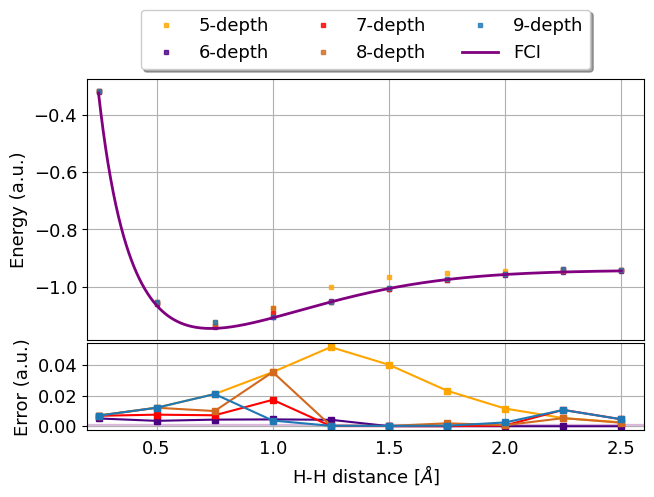

In [225]:
import matplotlib.pyplot as plt
# plt.plot(distance, data['energy'])
file = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

distance = np.linspace(0.25,2.5,10)

fontsize = 13
exact_FCI = []

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

for i in range(len(file)):
  exact_FCI.append(eval(file[i].split(' ')[-2]))


distance2 = np.linspace(0.25, 2.5, 2000)

a0.grid()
a0.plot(distance, optimize_energy[0], ".", marker='s', label = "5-depth", markersize = 3, alpha = 0.8, color="orange")
a0.plot(distance, optimize_energy[1], ".", marker='s', label = "6-depth", markersize = 3, alpha = 0.8, color="indigo")
a0.plot(distance, optimize_energy[2], ".", marker='s', label = "7-depth", markersize = 3, alpha = 0.8, color="red")
a0.plot(distance, optimize_energy[3], ".", marker='s', label = "8-depth", markersize = 3, alpha = 0.8, color="chocolate")
a0.plot(distance, optimize_energy[4], ".", marker='s', label = "9-depth", markersize = 3, alpha = 0.8)
a0.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
a0.legend(loc='upper center' ,bbox_to_anchor=(0.5 ,1.3),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize)
a0.set_ylabel('Energy (a.u.)', fontsize=fontsize)
a0.locator_params(axis="both", nbins=5)
a0.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=False)
a0.set_xlim((0.2, 2.6))
exact_FCI_compared = []

for i in range(len(distance)):
  exact_FCI_compared.append(eval(file[int(np.round((distance[i]-0.25)/((2.5-0.25)/1999)))].split(" ")[-2]))


absolute_error = [abs(np.array(exact_FCI_compared) - np.array(optimize_energy[i])) for i in range(5)]

a1.grid()
a1.plot(distance, absolute_error[0], "s-", marker='s', markersize=5, linewidth=1.5, color="orange")
a1.plot(distance, absolute_error[1], "s-", marker='s', markersize=5, linewidth=1.5, color="indigo")
a1.plot(distance, absolute_error[2], "s-", marker='s', markersize=5, linewidth=1.5, color="red")
a1.plot(distance, absolute_error[3], "s-", marker='s', markersize=5, linewidth=1.5, color="chocolate")
a1.plot(distance, absolute_error[4], "s-", marker='s', markersize=5, linewidth=1.5)
length = np.linspace(0.1,2.6,10)

#a1.set_yscale(('log'))
a1.set_xlim((0.2, 2.6))

a1.locator_params(axis="both", nbins=5)
a1.tick_params(axis="both", labelsize=fontsize, bottom=False)
a1.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.2, label='Training interval')
a1.set_ylabel('Error (a.u.)', fontsize = fontsize)
a1.set_xlabel(r'H-H distance [$\AA$]', fontsize=fontsize)

plt.tight_layout(pad=0.2)

fig.savefig('GA-VQE_H2_PES_multi-depth.eps', format='eps', dpi=600, bbox_inches='tight')

In [52]:
absolute_error

array([0.0069376 , 0.01208335, 0.02101781, 0.03537046, 0.0517024 ,
       0.04014913, 0.02322726, 0.01154897, 0.00533369, 0.00250978])

# NN-VQE

Collect data to train

In [40]:
from qiskit.algorithms.optimizers import COBYLA, NELDER_MEAD
import numpy as np
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
# from qiskit_algorithms import VQE
from qiskit import qpy
import json

basis_set = 'sto6g'

distance = np.array(list(np.linspace(0.6, 0.8, 10)) + list(np.linspace(1.4, 1.6 , 10)) + list(np.linspace(2, 2.2, 10)))

VQE_with_bestcircuit_GAQAS = []

# seeds = np.arange(1,32)
seeds = [50]
data = {'distance': [], 'thetas': [], 'energy': []}



for i, dis in enumerate(distance):
  for j, seed in enumerate(seeds):
    interation = 100

    # file = open(f'result_H2-modify_{seed}.txt', 'w')
    theta = dis
    driver = PySCFDriver(
        # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
        # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
        atom = f"H 0 0 0; H 0 0 {dis}",
        basis= basis_set,
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )

    problem = driver.run()
    hamiltonian = problem.hamiltonian
    nuc = hamiltonian.nuclear_repulsion_energy
    hamiltonian = hamiltonian.second_q_op()

    mapper = JordanWignerMapper()

    qubit_op = mapper.map(hamiltonian)


    with open(f"best_circuit.qpy", "rb") as qpy_file_read:
        ansatz = qpy.load(qpy_file_read)[0]


    counts = []
    values = []
    steps = []

    def callback(eval_count, params, value, meta):
        counts.append(eval_count)
        values.append(value)
        # steps.append(step)


    # optimizer = NELDER_MEAD(maxiter=100)
    # optimizer = COBYLA(maxiter=1000)
    optimizer = SLSQP(maxiter=interation)
    # optimizer = GradientDescent(maxiter=100, learning_rate=0.01)
    # optimizer = SPSA(maxiter=5000, learning_rate=0.001, perturbation=0.001)
    # optimizer = ADAM(maxiter=2000, tol=1e-06, lr=seed*0.001, beta_1=0.9, beta_2=0.99)

    # optimizer = SLSQP(maxiter=40)

    # optimizer = COBYLA(maxiter=500)

    algorithm_globals.random_seed = seed
    estimator = Estimator()

    vqe = VQE(estimator = estimator, ansatz = ansatz, optimizer=optimizer, callback=callback)
    result1 = vqe.compute_minimum_eigenvalue(qubit_op)
    result = result1.eigenvalue.real + nuc
    VQE_with_bestcircuit_GAQAS.append(result)
    data['distance'].append(float(dis))
    data['thetas'].append(list(result1.optimal_point))
    data['energy'].append(float(result))
    print(data['energy'])
    # print(result1.optimal_parameters)
    # print(result1.optimal_point)
    # print(result1.optimal_circuit)
    # print(result)

# Save data
with open(f"data_many-sample_60_1.json", "w") as outfile:
  json.dump(data, outfile)

FileNotFoundError: [Errno 2] No such file or directory: 'best_circuit.qpy'

Text(0.5, 0, 'H-H distance [$\\AA$]')

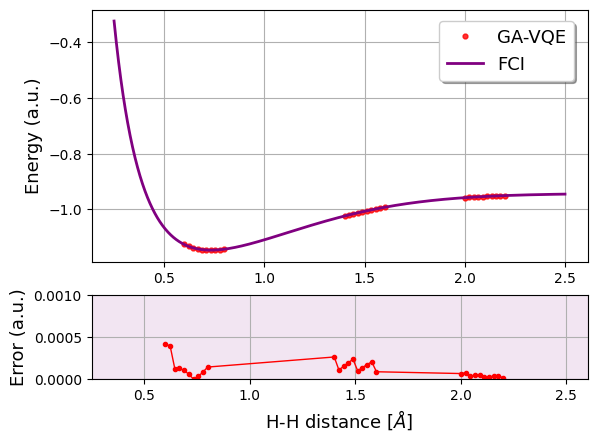

In [70]:
import matplotlib.pyplot as plt
# plt.plot(distance, data['energy'])
file = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

fontsize = 13
exact_FCI = []

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

for i in range(len(file)):
  exact_FCI.append(eval(file[i].split(' ')[-2]))


distance2 = np.linspace(0.25, 2.5, 2000)

a0.grid()
a0.plot(distance, data['energy'], "r.", label = "GA-VQE", markersize = 7, alpha = 0.8)
a0.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
a0.legend(loc='upper right' ,bbox_to_anchor=(0.99, 0.99),  ncol=1, fancybox=True, shadow=True, fontsize=fontsize)
a0.set_ylabel('Energy (a.u.)', fontsize=fontsize)

exact_FCI_compared = []

for i in range(len(distance)):
  exact_FCI_compared.append(eval(file[int(np.round((distance[i]-0.25)/((2.5-0.25)/1999)) + 1)].split(" ")[-2]))


absolute_error = abs(np.array(exact_FCI_compared) - np.array(data["energy"]))

a1.grid()
a1.plot(distance, absolute_error, "o-", color = 'red', markersize=3, linewidth=1)
length = np.linspace(0.1,2.6,10)

a1.set_ylim((0, 0.001))
a1.set_xlim((0.25, 2.6))

a1.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.1, label='Training interval')
a1.set_ylabel('Error (a.u.)', fontsize = fontsize)
a1.set_xlabel(r'H-H distance [$\AA$]', fontsize=fontsize)


Import data

In [1]:
import json

# Opening JSON file
f = open('./data_many-sample_60_1.json')
# Load data
data = json.load(f)
print(data)

{'distance': [0.6, 0.6222222222222222, 0.6444444444444445, 0.6666666666666666, 0.6888888888888889, 0.7111111111111111, 0.7333333333333334, 0.7555555555555555, 0.7777777777777778, 0.8, 1.4, 1.422222222222222, 1.4444444444444444, 1.4666666666666666, 1.488888888888889, 1.511111111111111, 1.5333333333333334, 1.5555555555555556, 1.577777777777778, 1.6, 2.0, 2.022222222222222, 2.0444444444444443, 2.066666666666667, 2.088888888888889, 2.111111111111111, 2.1333333333333333, 2.155555555555556, 2.177777777777778, 2.2], 'thetas': [[3.611860069224077, 3.31799934142087, 0.00010852342266755519, 5.949536809130025, -3.1567884331561515, 1.8462931831829381, -6.283018925841249, 1.5733851528975795, -3.0632283124935196, -2.79069794739149, 4.712199266922433, -3.1347346776368346, 0.0005661123598735531], [3.611860069224077, 3.32200695109866, -2.6561505983663366e-05, 5.949536809130025, -3.1507579537171804, 1.8462931831829383, -6.283233314760789, 1.5693927978251394, -3.0138617830666177, -2.7846663224363244, 4.7

Train NN model

In [73]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# load the dataset, split into input (X) and output (y) variables
# dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = data['distance']
y = data['thetas']

X = torch.tensor(X, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(y, dtype=torch.float32)


# define the model
model = nn.Sequential(
    nn.Linear(1, 9),
    nn.Sigmoid(),
    nn.Linear(9, 11),
    nn.ReLU(),
    nn.Linear(11, 10),
    nn.ReLU(),
    nn.Linear(10, 13)
)
print(model)

# train the model
# loss_fn   = nn.BCELoss()  # binary cross entropy
# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 20000
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
    print(y_pred)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Streaming output truncated to the last 5000 lines.
Finished epoch 15091, latest loss 8.373268792638555e-05
Finished epoch 15092, latest loss 8.373051241505891e-05
Finished epoch 15093, latest loss 8.37261468404904e-05
Finished epoch 15094, latest loss 8.372658339794725e-05
Finished epoch 15095, latest loss 8.372962474822998e-05
Finished epoch 15096, latest loss 8.372947195312008e-05
Finished epoch 15097, latest loss 8.372755837626755e-05
Finished epoch 15098, latest loss 8.372567390324548e-05
Finished epoch 15099, latest loss 8.372718730242923e-05
Finished epoch 15100, latest loss 8.372862066607922e-05
Finished epoch 15101, latest loss 8.372786396648735e-05
Finished epoch 15102, latest loss 8.372534648515284e-05
Finished epoch 15103, latest loss 8.372533920919523e-05
Finished epoch 15104, latest loss 8.372659067390487e-05
Finished epoch 15105, latest loss 8.37279440020211e-05
Finished epoch 15106, latest loss 8.37251209304668e-05
Finished epoch 15107, latest loss 8.372308366233483e-05


Save model

In [81]:
torch.save(model, './model_H2_many_sample_60_1.pth')

Load model

In [10]:
import torch
model = torch.load("./model_H2_many_sample_60_1.pth")
model.eval()

AttributeError: module 'torch' has no attribute 'load'

In [7]:
!pip show torch --version

Name: torch
Version: 2.2.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/user/.local/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: 


In [228]:
from qiskit.primitives import Estimator

number = 100

a = np.linspace(0.25, 2.5, number)
a = torch.tensor(a, dtype=torch.float32).reshape(-1,1)

energy = []

with torch.no_grad():
    y_pred = model(a)

a = np.linspace(0.25, 2.5, number)

with open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
      ansatz = qpy.load(qpy_file_read)[0]

for dis in range(len(y_pred.numpy())):
  driver = PySCFDriver(
        # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
        # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
        atom = f"H 0 0 0; H 0 0 {a[dis]}",
        basis= 'sto6g',
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )

  problem = driver.run()
  hamiltonian = problem.hamiltonian
  nuc = hamiltonian.nuclear_repulsion_energy
  hamiltonian = hamiltonian.second_q_op()

  mapper = JordanWignerMapper()


  qubit_op = mapper.map(hamiltonian)

  estimator = Estimator().run(ansatz, qubit_op, y_pred.numpy()[dis])
  energy.append(estimator.result().values[0] + nuc)


NameError: name 'torch' is not defined

NameError: name 'energy' is not defined

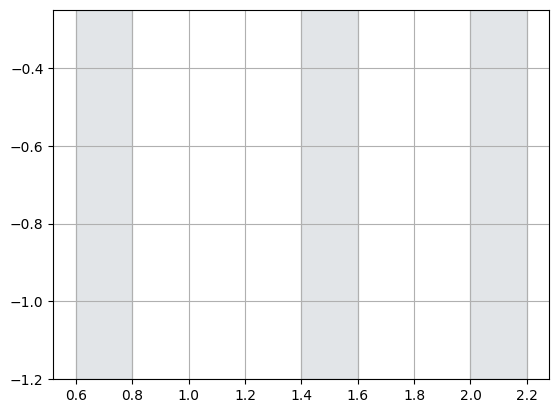

In [229]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

exact_FCI = []
fig, ax = plt.subplots()
# file1 = open('H4-chain-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('H4-square-molecules-sto6g-2000.txt', 'r').readlines()
file1 = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

for i in range(len(file1)):
  exact_FCI.append(eval(file1[i].split(' ')[-2]))

# distance1 = np.linspace(0.5, 1.5, 100)
# distance1 = np.linspace(0.25, 5, 100)
distance2 = np.linspace(0.25, 2.5, 2000)
# distance1 = np.linspace(70, 110, 10)
plt.grid()
# X_input = np.linspace(0.25,2.5,10)
X_input_1 = np.linspace(0.6, 0.8, 10)
X_input_2 = np.linspace(1.4, 1.6 , 10)
X_input_3 = np.linspace(2, 2.2, 10)
plt.fill_between(X_input_1, np.zeros(len(X_input_1))-1.2,np.zeros(len(X_input_1))-0.25, color='slategrey', alpha=.2, label='Training interval')
plt.fill_between(X_input_2, np.zeros(len(X_input_2))-1.2,np.zeros(len(X_input_2))-0.25, color='slategrey', alpha=.2)
plt.fill_between(X_input_3, np.zeros(len(X_input_3))-1.2,np.zeros(len(X_input_3))-0.25, color='slategrey', alpha=.2)
plt.ylim((-1.2,-0.25))
# ax.fill_between(X_input, -0.2, 0., color='orange', alpha=.15, ec=None,
#                     transform=ax.get_xaxis_transform())
# distance2 = np.linspace(70, 110, 2000)
plt.plot(a, energy, "r.", label = "Predict from NN", markersize = 7, alpha = 0.8)
plt.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
plt.ylabel("Energy (a.u.)")
# plt.ylim(-1.91,-1.85)
plt.legend(loc='upper left' ,bbox_to_anchor=(0.5, 0.98),  ncol=1, fancybox=True, shadow=True, fontsize=13)
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Number of qubits', fontsize=15)
fig.savefig('NN-VQE.pdf', format='pdf', dpi=600, bbox_inches='tight')

# Plot NN-VQE

NameError: name 'a' is not defined

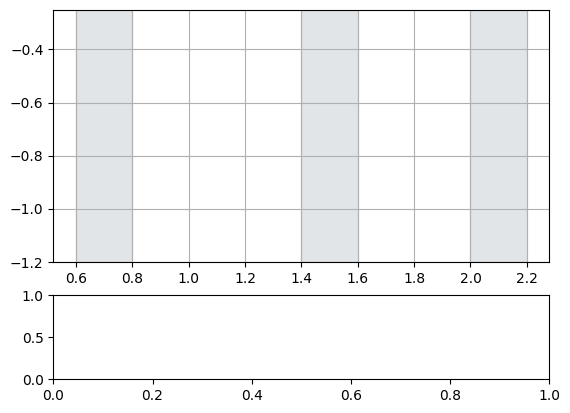

In [226]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


fontsize = 13
exact_FCI = []

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
# file1 = open('H4-chain-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('H4-square-molecules-sto6g-2000.txt', 'r').readlines()
file1 = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

for i in range(len(file1)):
  exact_FCI.append(eval(file1[i].split(' ')[-2]))

# distance1 = np.linspace(0.5, 1.5, 100)
# distance1 = np.linspace(0.25, 5, 100)
distance2 = np.linspace(0.25, 2.5, 2000)
# distance1 = np.linspace(70, 110, 10)
a0.grid()
# X_input = np.linspace(0.25,2.5,10)
X_input_1 = np.linspace(0.6, 0.8, 10)
X_input_2 = np.linspace(1.4, 1.6 , 10)
X_input_3 = np.linspace(2, 2.2, 10)
a0.fill_between(X_input_1, np.zeros(len(X_input_1))-1.2,np.zeros(len(X_input_1))-0.25, color='slategrey', alpha=.2, label='Training interval')
a0.fill_between(X_input_2, np.zeros(len(X_input_2))-1.2,np.zeros(len(X_input_2))-0.25, color='slategrey', alpha=.2)
a0.fill_between(X_input_3, np.zeros(len(X_input_3))-1.2,np.zeros(len(X_input_3))-0.25, color='slategrey', alpha=.2)
a0.set_ylim((-1.2,-0.25))
# ax.fill_between(X_input, -0.2, 0., color='orange', alpha=.15, ec=None,
#                     transform=ax.get_xaxis_transform())
# distance2 = np.linspace(70, 110, 2000)
a0.plot(a, energy, "r.", label = "Predict from NN", markersize = 7, alpha = 0.8)
a0.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
# plt.ylim(-1.91,-1.85)
a0.legend(loc='upper left' ,bbox_to_anchor=(0.55, 0.99),  ncol=1, fancybox=True, shadow=True, fontsize=12)
a0.set_ylabel('Energy (a.u.)', fontsize=fontsize)
a0.locator_params(axis="both", nbins=5)
a0.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=False)
a0.set_xlim((0.2, 2.6))

exact_FCI_compared = []


file = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()

for i in range(100):
  dis = 0.25 + i*(2.5-0.25)/99
  exact_FCI_compared.append(eval(file[round((dis-0.25)/((2.5-0.25)/1999))].split(" ")[-2]))

a1.grid()

absolute_error = abs(np.array(exact_FCI_compared) - np.array(energy))

a1.plot(a, absolute_error, "o-", color = 'red', markersize=3, linewidth=1)

a1.set_ylim((0, 0.01))
a1.set_xlim((0.2, 2.6))
a1.fill_between(X_input_1, np.zeros(len(X_input_3)) + 0.02, color='slategrey', alpha=.2, label='Training interval')
a1.fill_between(X_input_2, np.zeros(len(X_input_3)) + 0.02, color='slategrey', alpha=.2)
a1.fill_between(X_input_3, np.zeros(len(X_input_3)),np.zeros(len(X_input_3)) + 0.02, color='slategrey', alpha=.2)

a1.locator_params(axis="both", nbins=5)
a1.tick_params(axis="both", labelsize=fontsize, bottom=False)

length = np.linspace(0.1,2.6,10)
a1.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.3, label='Training interval')
a1.set_ylabel('Error (a.u.)', fontsize = fontsize)
a1.set_xlabel(r'H-H distance [$\AA$]', fontsize=fontsize)

plt.tight_layout(pad=0.2)

fig.savefig('NN-VQE.pdf', format='pdf', dpi=600, bbox_inches='tight')